In [ ]:
!git clone https://github.com/muxspace/facial_expressions.git

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214
Receiving objects: 100% (14214/14214), 239.65 MiB | 44.91 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Updating files: 100% (13996/13996), done.


In [ ]:
import csv
data = {}
with open('/content/facial_expressions/data/legend.csv') as f:
  reader = csv.reader(f)
  next(reader)

  for row in reader:
    key = row[2].lower()
    if key in data:
      data[key].append(row[1])
    else:
      data[key] = [row[1]]

In [ ]:
for key, value in data.items():
    print(key, value, end="\n")

anger ['facial-expressions_2868588k.jpg', 'Alejandro_Toledo_0004.jpg', 'Alexander_Lukashenko_0001.jpg', 'Alicia_Hollowell_0001.jpg', 'Alvaro_Noboa_0002.jpg', 'Al_Gore_0002.jpg', 'Anastasia_Myskina_0001.jpg', 'Anastasia_Myskina_0003.jpg', 'Angelina_Jolie_0005.jpg', 'Arnold_Schwarzenegger_0023.jpg', 'Atal_Bihari_Vajpayee_0010.jpg', 'Ben_Braun_0001.jpg', 'Billy_Crystal_0004.jpg', 'Billy_Donovan_0001.jpg', 'Bill_Graham_0005.jpg', 'Bob_Huggins_0001.jpg', 'Bob_Huggins_0004.jpg', 'Brian_Scalabrine_0001.jpg', 'Bud_Selig_0004.jpg', 'Carlos_Arroyo_0001.jpg', 'Carlos_Ortega_0001.jpg', 'Celine_Dion_0008.jpg', 'Charles_Moose_0001.jpg', 'Charles_Moose_0002.jpg', 'Charles_Moose_0004.jpg', 'Charles_Moose_0006.jpg', 'Charles_Moose_0013.jpg', 'Colin_Powell_0007.jpg', 'Colin_Powell_0030.jpg', 'Colin_Powell_0043.jpg', 'Colin_Powell_0055.jpg', 'Colin_Powell_0149.jpg', 'Colin_Powell_0180.jpg', 'Colin_Powell_0181.jpg', 'Colin_Powell_0188.jpg', 'Colleen_Jones_0001.jpg', 'Dariusz_Michalczewski_0001.jpg', 'Denn

In [ ]:
emotion_list = list(data.keys())
emotion_list

['anger',
 'surprise',
 'disgust',
 'fear',
 'neutral',
 'happiness',
 'sadness',
 'contempt']

In [ ]:
import os

os.mkdir('master_data')
os.mkdir('master_data/training')
os.mkdir('master_data/testing')

In [ ]:
for emotion in emotion_list:
  os.mkdir(os.path.join('master_data/training/', emotion))
  os.mkdir(os.path.join('master_data/testing/', emotion))

In [ ]:
from shutil import copyfile
split_size = 0.8

for emotion, images in data.items():
  train_size = int(split_size*len(images))
  train_images = images[:train_size]
  test_images = images[train_size:]

  for image in train_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/training', emotion, image)
    copyfile(source, dest)

  for image in test_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/testing', emotion, image)
    copyfile(source, dest)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = tf.keras.models.Sequential([
      Conv2D(16, (3,3), activation='relu', input_shape = (100, 100, 3)),
      MaxPooling2D(2, 2),
      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(1024, activation='relu'),
      Dense(8, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 12.7 MB/s eta 0:00:00


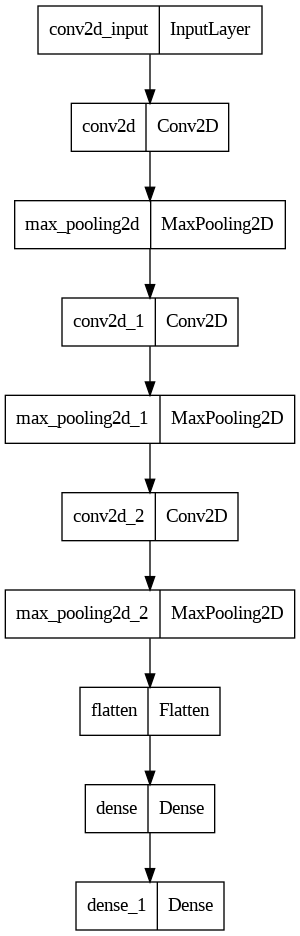

In [ ]:
from keras.utils import plot_model
plot_model(model)

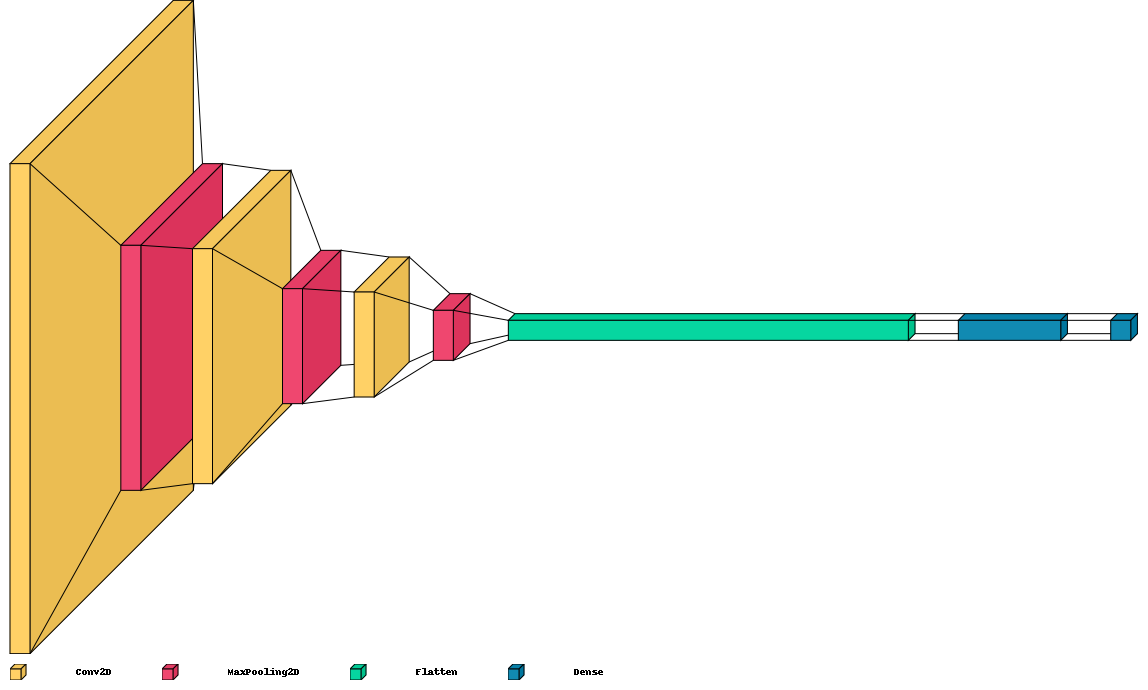

In [ ]:
import visualkeras
visualkeras.layered_view(model, spacing = 50, legend = True, scale_xy=5)

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
train_dir = '/content/master_data/training'
test_dir = '/content/master_data/testing'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [ ]:
es = EarlyStopping(monitor='val_acc', patience = 2, min_delta=0.01)

In [ ]:
history = model.fit_generator(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data = test_generator,
                    callbacks = [es])

Epoch 1/10


<ipython-input-41-d5d14d5a98ff>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


86/86 [==============================] - 84s 973ms/step - loss: 1.0451 - acc: 0.4938 - val_loss: 1.0459 - val_acc: 0.5026
Epoch 2/10
86/86 [==============================] - 86s 1s/step - loss: 1.0427 - acc: 0.5008 - val_loss: 1.0472 - val_acc: 0.5011
Epoch 3/10
86/86 [==============================] - 84s 972ms/step - loss: 1.0411 - acc: 0.5001 - val_loss: 1.0510 - val_acc: 0.5011


In [ ]:
test_loss, test_accuracy = model.evaluate_generator(test_generator)

<ipython-input-42-307f62691bfd>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator)


In [ ]:
print(history.history['loss'])  # Training loss
print(history.history['acc'])  # Training accuracy
print(history.history['val_loss'])  # Validation loss
print(history.history['val_acc'])  # Validation accuracy

[1.0451041460037231, 1.042738437652588, 1.0411136150360107]
[0.49383053183555603, 0.5007768869400024, 0.5001370906829834]
[1.0459411144256592, 1.0471986532211304, 1.0510427951812744]
[0.50255286693573, 0.5010941028594971, 0.5010941028594971]


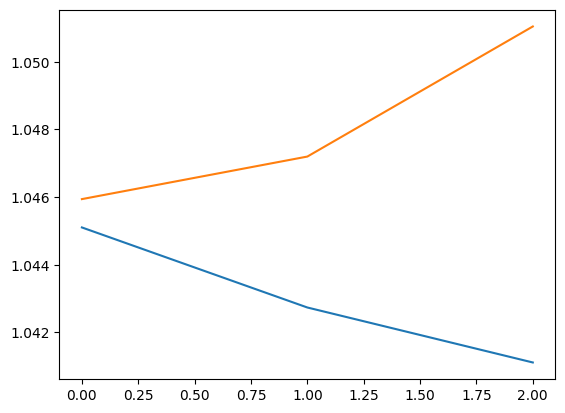

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import cv2
import numpy as np

# Load and preprocess the image
image = cv2.imread('/content/master_data/testing/disgust/Jayamadhuri_191.jpg')
image = cv2.resize(image, (100, 100))  # Resize the image to match the model's input shape
image = image.astype('float32') / 255.0  # Normalize the image

# Expand dimensions to add batch dimension
image = np.expand_dims(image, axis=0)

# Predict
predictions = model.predict(image)

# Interpret results
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class]

print('Predicted Class:', predicted_class)
print('Confidence:', confidence)

1/1 [==============================] - 0s 78ms/step
Predicted Class: 5
Confidence: 0.56495273
